<h2>DATA 620 - Week Eight - Assignment High Frequency Words</h2>

<h3>Mohamed Thasleem, Kalikul Zaman and Jeyaraman, Ramalingam</h3>

<h3>Introduction</h3>

High frequency words using NLTK, In this analysis we took the corpus data from Internet Archvive "Goody Two Shoes" from University of California Libraries published in 1888. The objective is to find how the words have been distributed accorss the story and its insights

The details about the book will be present in the https://archive.org/details/goodytwoshoes00newyiala/mode/2up

In [64]:
import pandas as pd
import nltk, re, pprint
from nltk import word_tokenize
from nltk.corpus import stopwords
from urllib import request
import matplotlib.pyplot as plt
%matplotlib inline
#nltk.download()

<h3>Reading Data</h3>

In [30]:
# Loading the data
url = "https://ia803103.us.archive.org/14/items/goodytwoshoes00newyiala/goodytwoshoes00newyiala_djvu.txt"
response = request.urlopen(url)
story = response.read().decode('utf8')

# Cleaning the data by removing the unnessary headers and footers
text_start = story.find("17ARMER MEANWELL was at one time a very rich")
text_end = story.find("and was known as")
story = story[text_start:text_end]
#Printing the Story
print(story)

17ARMER MEANWELL was at one time a very rich 
man. He owned large fields, and had fine flocks of 
sheep, and plenty of money. But all at once his good for- 
tune seemed to desert him. Year after year his crops failed, 
his sheep died off, and he was obliged to borrow money to 
pay his rent and the wages of those who worked on the 
farm. 

At last he had to sell his farm, but even this did not bring 
him in money enough to pay his debts, and he was worse off 
than ever. 

. Among those who had lent money to Farmer Mean well 
were Sir Thomas Gripe, and a Farmer named Graspall. 

Sir Thomas was a very rich man indeed, and Farmer 
Graspall had more money than he could possibly use. But 
they were both very greedy and covetous, and particularly 
hard on those who owed them anything. Farmer Graspall 
abused Farmer Meanwell and called him all sorts of dreadful 
names ; but the rich Sir Thomas Gripe was more cruel still, 
and wanted the poor debtor shut up in jail. 

So poor Farmer Meanwell ha

<h3>Words Details</h3>

In [31]:
tokens = word_tokenize(story)
words = [w for w in tokens if w.isalpha()]
words = [w.lower() for w in words]

In [32]:
len(tokens)

2748

In [33]:
len(set(words))

675

There are 675 unique words in the story

<h3>Stemmers</h3>

Stemmers remove morphological affixes from words, leaving only the word stem, We are using Porter Stemmer method

In [34]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [35]:
stem = [ps.stem(w) for w in words]
stem = set(stem)
len(stem)

618

<h3>Lemmatisation</h3>

Lemmatisation in linguistics is the process of grouping together the inflected forms of a word so they can be analysed as a single item, We are making use of WordNetLemmatizer from NLTK

In [10]:
from nltk.stem import WordNetLemmatizer
wordnet = WordNetLemmatizer()

In [36]:
lemma = [wordnet.lemmatize(w) for w in words]
lemma = set(lemma)
len(lemma)

650

<h3>Unique words represent half of the total words</h3>

We can consider the most common words are top 200 words, and to find out the unique words represent half of the total words in the corpus

In [42]:
dist = nltk.FreqDist(words)
top_words = dist.most_common(200)

In [43]:
i = 0
half_total = []
for w in top_words:
    if i >= len(tokens)/2:
        break
    else:
        i = i + w[1]
        half_total.append(w)
len(half_words)
print(half_words)

[('and', 145), ('the', 128), ('to', 90), ('she', 58), ('was', 57), ('a', 54), ('of', 42), ('in', 39), ('her', 38), ('he', 31), ('had', 30), ('they', 25), ('two', 25), ('that', 24), ('were', 23), ('goody', 22), ('shoes', 22), ('so', 21), ('him', 20), ('for', 20), ('but', 19), ('his', 18), ('not', 18), ('with', 18), ('them', 17), ('it', 17), ('all', 16), ('out', 15), ('as', 15), ('one', 14), ('this', 13), ('margery', 13), ('children', 12), ('came', 12), ('at', 11), ('good', 11), ('from', 11), ('very', 10), ('on', 10), ('could', 10), ('who', 9), ('sir', 9), ('said', 9), ('down', 9), ('after', 8), ('went', 8), ('next', 8), ('little', 8), ('soon', 8), ('when', 8), ('their', 8), ('some', 8), ('made', 8), ('letters', 8), ('large', 7), ('money', 7), ('farmer', 7), ('poor', 7), ('up', 7), ('house', 7), ('there', 7), ('rich', 6), ('did', 6), ('well', 6)]


<h3>Highest frequency words in this corpus</h3>

In [58]:
top_words = dist.most_common(200)
top_wordsdf = pd.DataFrame(top_words, columns = ['Word', 'Freq'])
#Calculate Relative_Frequency
top_wordsdf['Relative_Freq'] = top_wordsdf['Freq']/top_wordsdf['Freq'].sum()
top_wordsdf

,Word,Freq,Relative_Freq
0,and,145,0.078890
1,the,128,0.069641
2,to,90,0.048966
3,she,58,0.031556
4,was,57,0.031012
...,...,...,...
195,trotted,2,0.001088
196,around,2,0.001088
197,hand,2,0.001088
198,became,2,0.001088


<h4>Words Frquency Plot</h4>

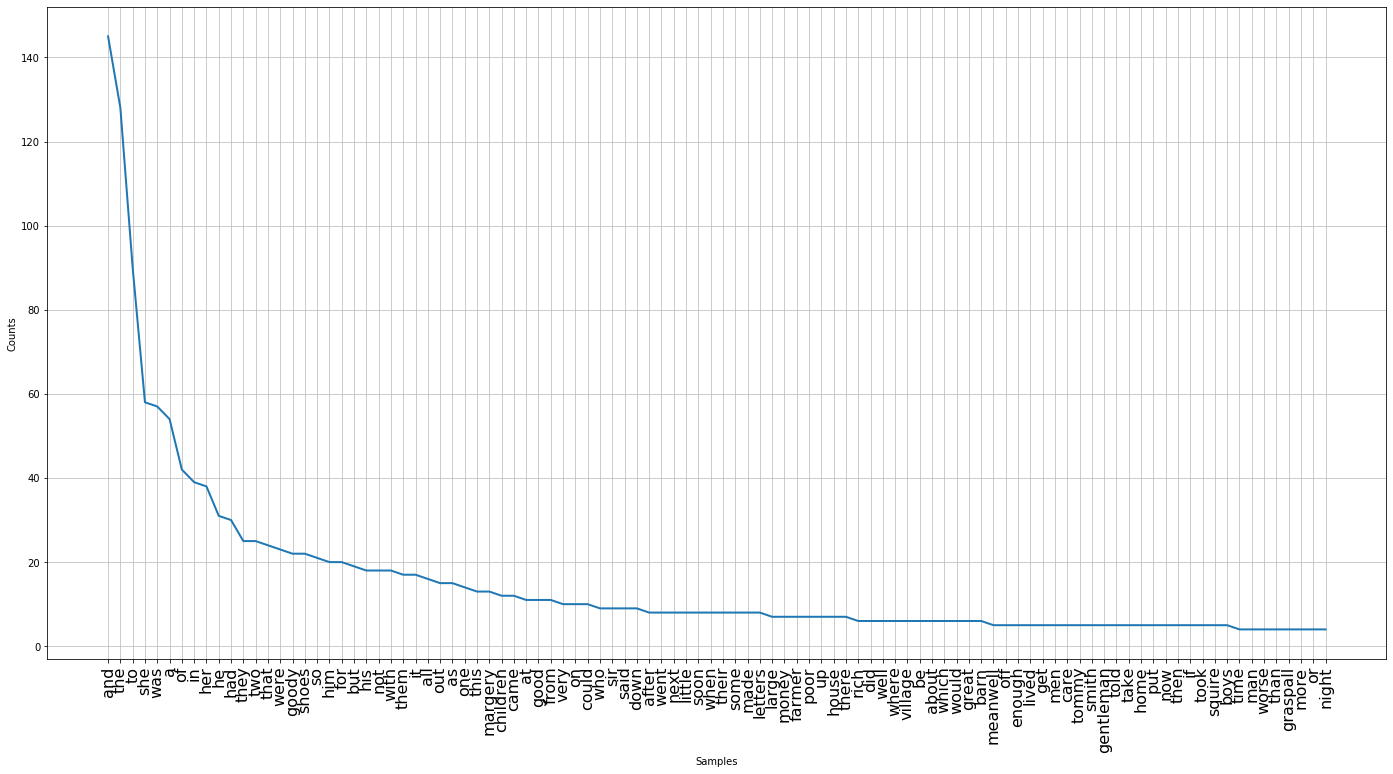

In [55]:
plt.figure(figsize=(24, 12))
plt.rc('xtick', labelsize=16) 
dist.plot(100)

<h4>Relative Frquency Plot</h4>

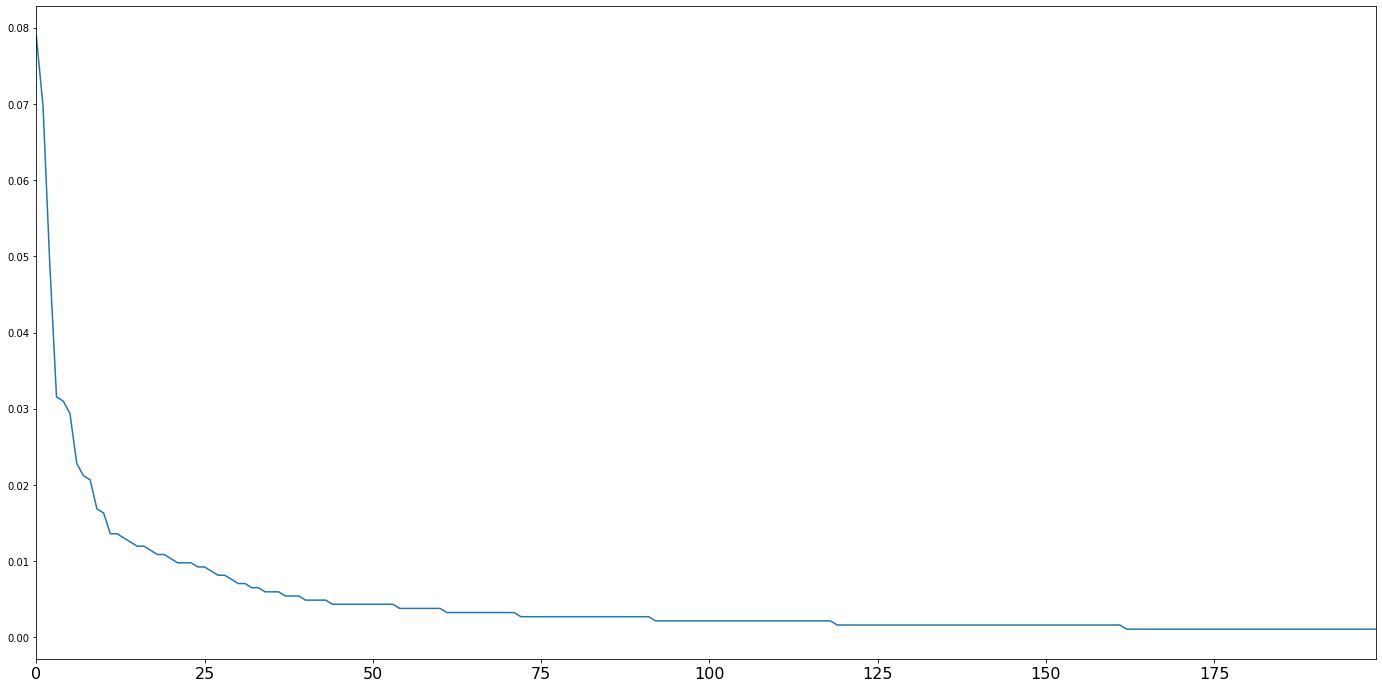

In [59]:
plt.figure(figsize=(24, 12))
top_wordsdf['Relative_Freq'].plot()

<h3>Zipf’s law</h3>

The probability of occurrence of words or other items starts high and tapers off. Thus, a few occur very often while many others occur rarely

In [18]:
#perform some cleaning
stoplist = stopwords.words('english')
uwords = [w for w in words if w not in stoplist]
ufd = nltk.FreqDist(uwords)

In [62]:
zwords = top_words = dist.most_common(200)
x_vec = [i+1 for i in range(len(zwords))]
y_vec = [freq for (word,freq) in zwords]

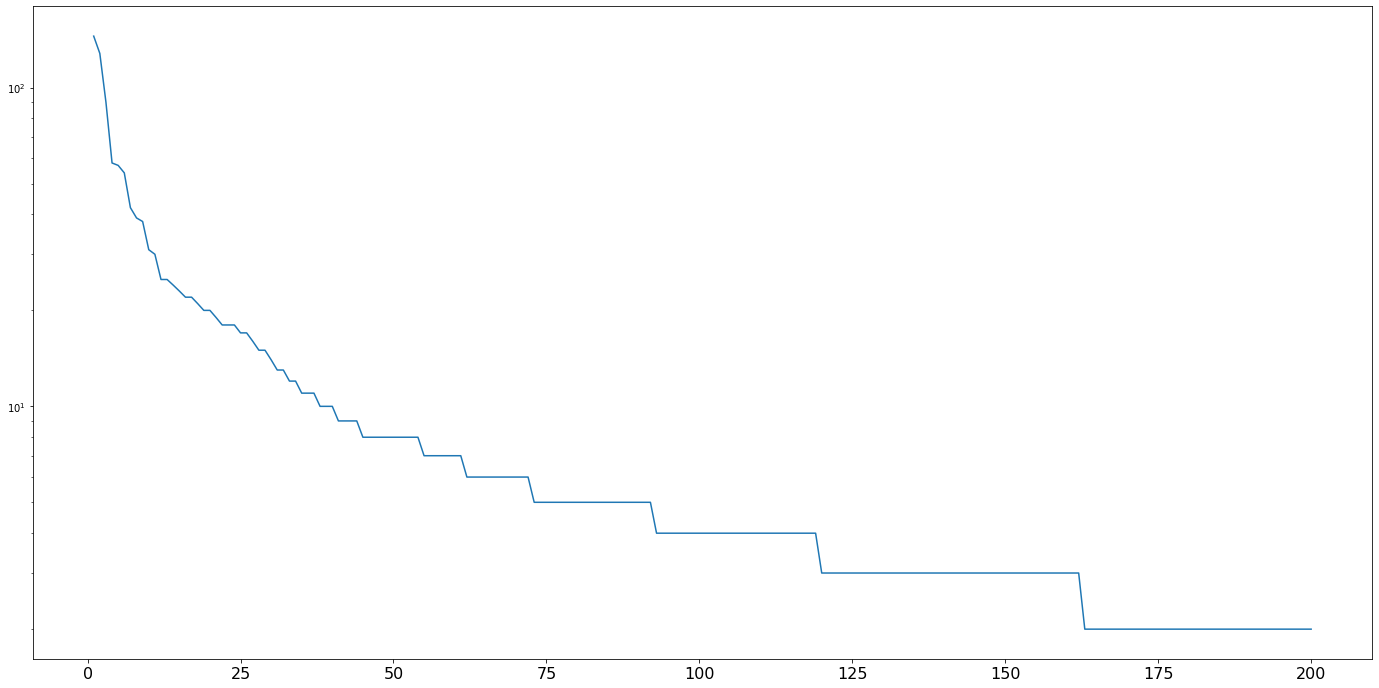

In [63]:
plt.figure(figsize=(24,12))
plt.semilogy(x_vec, y_vec)
plt.show()

We can see that most frequent word first. Zipf’s Law states that the frequency of a word type is inversely proportional to its rank

<h3>Conclusion</h3>

Since we dealt with limited number of words, it may obey the zipf law, also the corpus might be differ from the context and author of the book who written in such a way, In this case book tells some story to children so author used more basic words such and, the , she more often compared to actual meaning words.